Machine Learning Overview - Training and Evaluation
=====

**Objective**: Familiarize yourself with some general procedures for training a machine learning model.  

In [ ]:
MY_NAME = "Chris Phillips" # <-- Your name here

1) Bring in the game data.  Split it into 2 datasets (i.e., a training and test dataset) using an 80-20 split.  For each one, create an X and y (i.e., input features and target).  

In [5]:
import numpy as np

data = np.genfromtxt('http://mlid.cps.cmich.edu/resources/game-data.txt', delimiter=' ')

N = int(0.8 * data.shape[0]) 

### SOLUTION ###

GAME_train_X = data[:N,:2]
GAME_train_y = data[:N,-1]
GAME_test_X = data[N:,:2]
GAME_test_y = data[N:,-1]

print GAME_train_X.shape, GAME_train_y.shape, GAME_test_X.shape, GAME_test_y.shape

(8000, 2) (8000,) (2000, 2) (2000,)


2) Train up a neural network using sklearn [link](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.fit).  We will use the default parameters and fit with the training data.  

In [9]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2))
clf.fit(GAME_train_X, GAME_train_y)

print "Accuracy on training data ...", clf.score(GAME_train_X, GAME_train_y)
print "Accuracy on test data ...", clf.score(GAME_test_X, GAME_test_y)


Accuracy on training data ... 1.0
Accuracy on test data ... 1.0


That's pretty impressive.  Let's try another problem and see how we do.

3) Load only two digits of the MNIST data.  Then train up a neural network for this binary classification task.  

In [17]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
import numpy as np

digits, targets = load_digits(n_class=2, return_X_y=True)

### Solution ###
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(25,10))
clf.fit(digits, targets)

print "Accuracy on training data ...", clf.score(digits, targets)

Accuracy on training data ... 1.0


4) Load in all of the MNIST data.  The targets will need to be converted into a vector, with one index representing each class.  Also split all of the data into a training and test set.  

In [20]:
from sklearn.datasets import load_digits
import numpy as np

digits, targets = load_digits(return_X_y=True)

# Have a look at digits and targets ... 

# Split
N = int(0.8 * digits.shape[0]) 

MDIGIT_train_X = digits[:N,:]
# Create a target vector, using one-bit hot encoding
MDIGIT_train_y = np.zeros((N, 10), dtype=int)
for i, clss in enumerate(targets[:N]):
    MDIGIT_train_y[i, clss] = 1

MDIGIT_test_X = digits[N:,:]
# Create another target vector for the test vector.  
MDIGIT_test_y = np.zeros((targets[N:].shape[0], 10), dtype=int)
for i, clss in enumerate(targets[N:]):
    MDIGIT_test_y[i, clss] = 1

Train a number of neural networks of different architectures and display the accuracy on the training and text data.  

In [22]:
from sklearn.neural_network import MLPClassifier

for architecture in [(5, 2), (10, 10), (25, 10), (50, 25, 10), (50, 25, 25), (50, 25, 25, 25), (150, 150)]:

    ### Solution ###
    
    # Train and evaluate several models with sigmoid activation function
    clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=architecture)
    clf.fit(MDIGIT_train_X, MDIGIT_train_y)
    
    print "Training accuracy", architecture, ". . .", clf.score(MDIGIT_train_X, MDIGIT_train_y)
    print "Test accuracy", architecture, ". . .", clf.score(MDIGIT_test_X, MDIGIT_test_y)

Training accuracy (5, 2) . . . 0.0
Test accuracy (5, 2) . . . 0.0
Training accuracy (10, 10) . . . 0.09881697981906751
Test accuracy (10, 10) . . . 0.09722222222222222
Training accuracy (25, 10) . . . 0.9498956158663883
Test accuracy (25, 10) . . . 0.85
Training accuracy (50, 25, 10) . . . 0.9352818371607515
Test accuracy (50, 25, 10) . . . 0.7972222222222223
Training accuracy (50, 25, 25) . . . 0.9993041057759221
Test accuracy (50, 25, 25) . . . 0.8722222222222222
Training accuracy (50, 25, 25, 25) . . . 0.9450243562978428
Test accuracy (50, 25, 25, 25) . . . 0.8055555555555556
Training accuracy (150, 150) . . . 1.0
Test accuracy (150, 150) . . . 0.8472222222222222


In [24]:
from sklearn.neural_network import MLPClassifier

for architecture in [(5, 2), (10, 10), (25, 10), (50, 25, 10), (50, 25, 25), (50, 25, 25, 25), (150, 150)]:

    ### Solution ###
    
    # Train and evaluate several models with relu activation function
    clf = MLPClassifier(solver='lbfgs', activation='relu', hidden_layer_sizes=architecture)
    clf.fit(MDIGIT_train_X, MDIGIT_train_y)
    
    print "Training accuracy", architecture, ". . .", clf.score(MDIGIT_train_X, MDIGIT_train_y)
    print "Test accuracy", architecture, ". . .", clf.score(MDIGIT_test_X, MDIGIT_test_y)



Training accuracy (5, 2) . . . 0.0
Test accuracy (5, 2) . . . 0.0
Training accuracy (10, 10) . . . 0.20041753653444677
Test accuracy (10, 10) . . . 0.21388888888888888
Training accuracy (25, 10) . . . 0.9986082115518441
Test accuracy (25, 10) . . . 0.8555555555555555
Training accuracy (50, 25, 10) . . . 1.0
Test accuracy (50, 25, 10) . . . 0.8444444444444444
Training accuracy (50, 25, 25) . . . 1.0
Test accuracy (50, 25, 25) . . . 0.8666666666666667
Training accuracy (50, 25, 25, 25) . . . 1.0
Test accuracy (50, 25, 25, 25) . . . 0.8555555555555555
Training accuracy (150, 150) . . . 1.0
Test accuracy (150, 150) . . . 0.875


Notice how the accuracy depends on architecture and activation functions.  Let's also look at the effect of length of training.

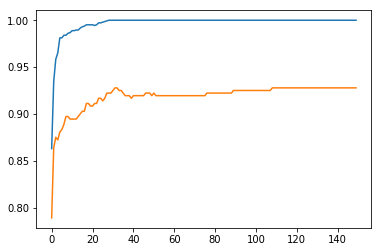

In [26]:
epochs = 150
batch_size = 20


digits, targets = load_digits(return_X_y=True)

N = int(0.8 * digits.shape[0]) 
MDIGIT_train_X = digits[:N,:]
MDIGIT_train_y = targets[:N]

MDIGIT_test_X = digits[N:,:]
MDIGIT_test_y = targets[N:]

clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(75, 75, 50), random_state=1)

training_accuracies = []
test_accuracies = []

for i in range(0, epochs):
    # print "Starting epoch ", i + 1

    for j in range(0, MDIGIT_train_X.shape[0] // batch_size):

        Xt = MDIGIT_train_X[j*batch_size:(j+1)*batch_size,:]
        Yt = MDIGIT_train_y[j*batch_size:(j+1)*batch_size]
        
        clf.partial_fit(Xt, Yt, np.unique(MDIGIT_train_y))
        
    training_accuracies.append(clf.score(MDIGIT_train_X, MDIGIT_train_y))
    test_accuracies.append(clf.score(MDIGIT_test_X, MDIGIT_test_y))
        

%matplotlib inline
import matplotlib.pyplot as plt
        
plt.plot(training_accuracies)
plt.plot(test_accuracies)